### 1. Project title: Implement the Jewellery Price Optimisation with Machine Learning; to be able to predict the prices of the jewelry pieces.

### 2. Methodology
The project will be carried out using python and MLFLOW. MLFLOW to be able to track, package, deploy, and manage Machine Learning models in a scalable and reproducible way.

### Start coding
*Step 1: Extract data from the csv file into a Pandas Dataframe

*Step 2: Transform the data (i.e clean the data) - Deal with missing and duplicate data

*step 3: EDA

*step 4: Data preparation

*step 5:Data modelling

*step 6:Model evaluation

*step 7: model deployment

### Data Description
The features contained in the dataset are:

Order datetime: The time at which the order was placed

Order ID: Identifiers for the different orders placed

Purchased product ID: Identifiers for the different product ordered for

Quantity of SKU in the order: Quantity of jewelry pieces ordered for

Category ID: Identifier for the jewelry category

Category alias: Name of jewelry category e.g. earring

Brand ID: Identifier for jeweler brand

Price in USD: Jewelry price in US Dollars

User ID: Identifier for user/customer

Product gender (for male/female) (Target gender for jewelry piece)

Main Color: Overall color of jewelry piece

Main metal: Main metal used for mounting

Main gem: Main gem mounted on jewelry piece


In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

In [3]:
pip install lightgbm

In [4]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

#set visualization theme
sns.set()

In [5]:
# import the dataset
data = pd.read_csv(r"C:\Users\omats\OneDrive\Desktop\Jewelry_Dataset.csv")

data.columns = [
    "Order_Datetime",
    "Order_ID",
    "Product_id",
    "SKU_Quantity",
    "Category_ID",
    "Category",
    "Brand_ID",
    "Price_USD",
    "User_ID",
    "Target_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem",
]

In [6]:
# peek at the data
data.head(10)

,Order_Datetime,Order_ID,Product_id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1.924900e+18,1.806830e+18,1,1.806830e+18,NaN,NaN,212.14,1.515920e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1.925510e+18,1.842210e+18,1,1.806830e+18,jewelry.pendant,1.0,54.66,1.515920e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1.925630e+18,1.835570e+18,1,1.806830e+18,jewelry.pendant,0.0,88.90,1.515920e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1.925740e+18,1.873940e+18,1,1.806830e+18,jewelry.necklace,0.0,417.67,1.515920e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1.925760e+18,1.835570e+18,1,1.806830e+18,jewelry.earring,1.0,102.27,1.515920e+18,NaN,red,gold,NaN
5,2018-12-02 22:09:34 UTC,1.925760e+18,1.600020e+18,1,1.806830e+18,jewelry.earring,0.0,150.55,1.515920e+18,NaN,red,gold,diamond
6,2018-12-02 22:16:20 UTC,1.925760e+18,1.835570e+18,1,1.806830e+18,jewelry.earring,0.0,83.42,1.515920e+18,NaN,white,gold,fianit
7,2018-12-03 07:03:49 UTC,1.926030e+18,1.811800e+18,1,1.806830e+18,jewelry.pendant,2.0,60.27,1.515920e+18,f,red,gold,pearl
8,2018-12-03 09:48:34 UTC,1.926110e+18,1.836280e+18,1,1.806830e+18,jewelry.earring,1.0,217.40,1.515920e+18,NaN,red,gold,diamond
9,2018-12-03 09:48:34 UTC,1.926110e+18,1.877640e+18,1,1.806830e+18,jewelry.ring,1.0,180.71,1.515920e+18,NaN,white,gold,diamond


In [7]:
# Check for missing values
data.isnull().sum()

Order_Datetime        0
Order_ID              0
Product_id            0
SKU_Quantity          0
Category_ID        5352
Category           9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Target_Gender     48167
Main_Color         7660
Main_Metal         5462
Main_Gem          34058
dtype: int64

In [8]:
# Checking how much data is available
data.shape

(95910, 13)

In [9]:
# feature cardinality
data.nunique()

Order_Datetime    74504
Order_ID          32909
Product_id         1706
SKU_Quantity          1
Category_ID           2
Category            218
Brand_ID             37
Price_USD          3166
User_ID             396
Target_Gender         2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

In [10]:
# Data description
data.describe()

,Order_ID,Product_id,SKU_Quantity,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815968e+18,1.0,1.805948e+18,8.891061e+16,362.213017,1.512648e+18
std,1.934750e+17,2.136788e+17,0.0,2.083947e+16,3.559661e+17,444.157665,2.374826e+16
min,1.924900e+18,1.313550e+18,1.0,1.313680e+18,0.000000e+00,0.990000,1.313550e+18
25%,2.379732e+18,1.515970e+18,1.0,1.806830e+18,0.000000e+00,145.620000,1.515920e+18
50%,2.524285e+18,1.956660e+18,1.0,1.806830e+18,1.000000e+00,258.770000,1.515920e+18
75%,2.644350e+18,1.956660e+18,1.0,1.806830e+18,1.000000e+00,431.370000,1.515920e+18
max,2.719020e+18,2.541960e+18,1.0,1.806830e+18,1.550610e+18,34448.600000,1.554300e+18


In [11]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  float64
 2   Product_id      95910 non-null  float64
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 9.5+ MB


In [12]:
#Check for Duplicate value
data.duplicated().sum()

2955

In [13]:
# features with a cardinality of 1 (invariant features)
invariant_features = data.nunique()[data.nunique()==1].index.tolist()

In [14]:
invariant_features

['SKU_Quantity']

In [15]:
# Check for label distribution
data["Price_USD"].skew()

18.95906072625981

### Observation

The distribution is right skewed 

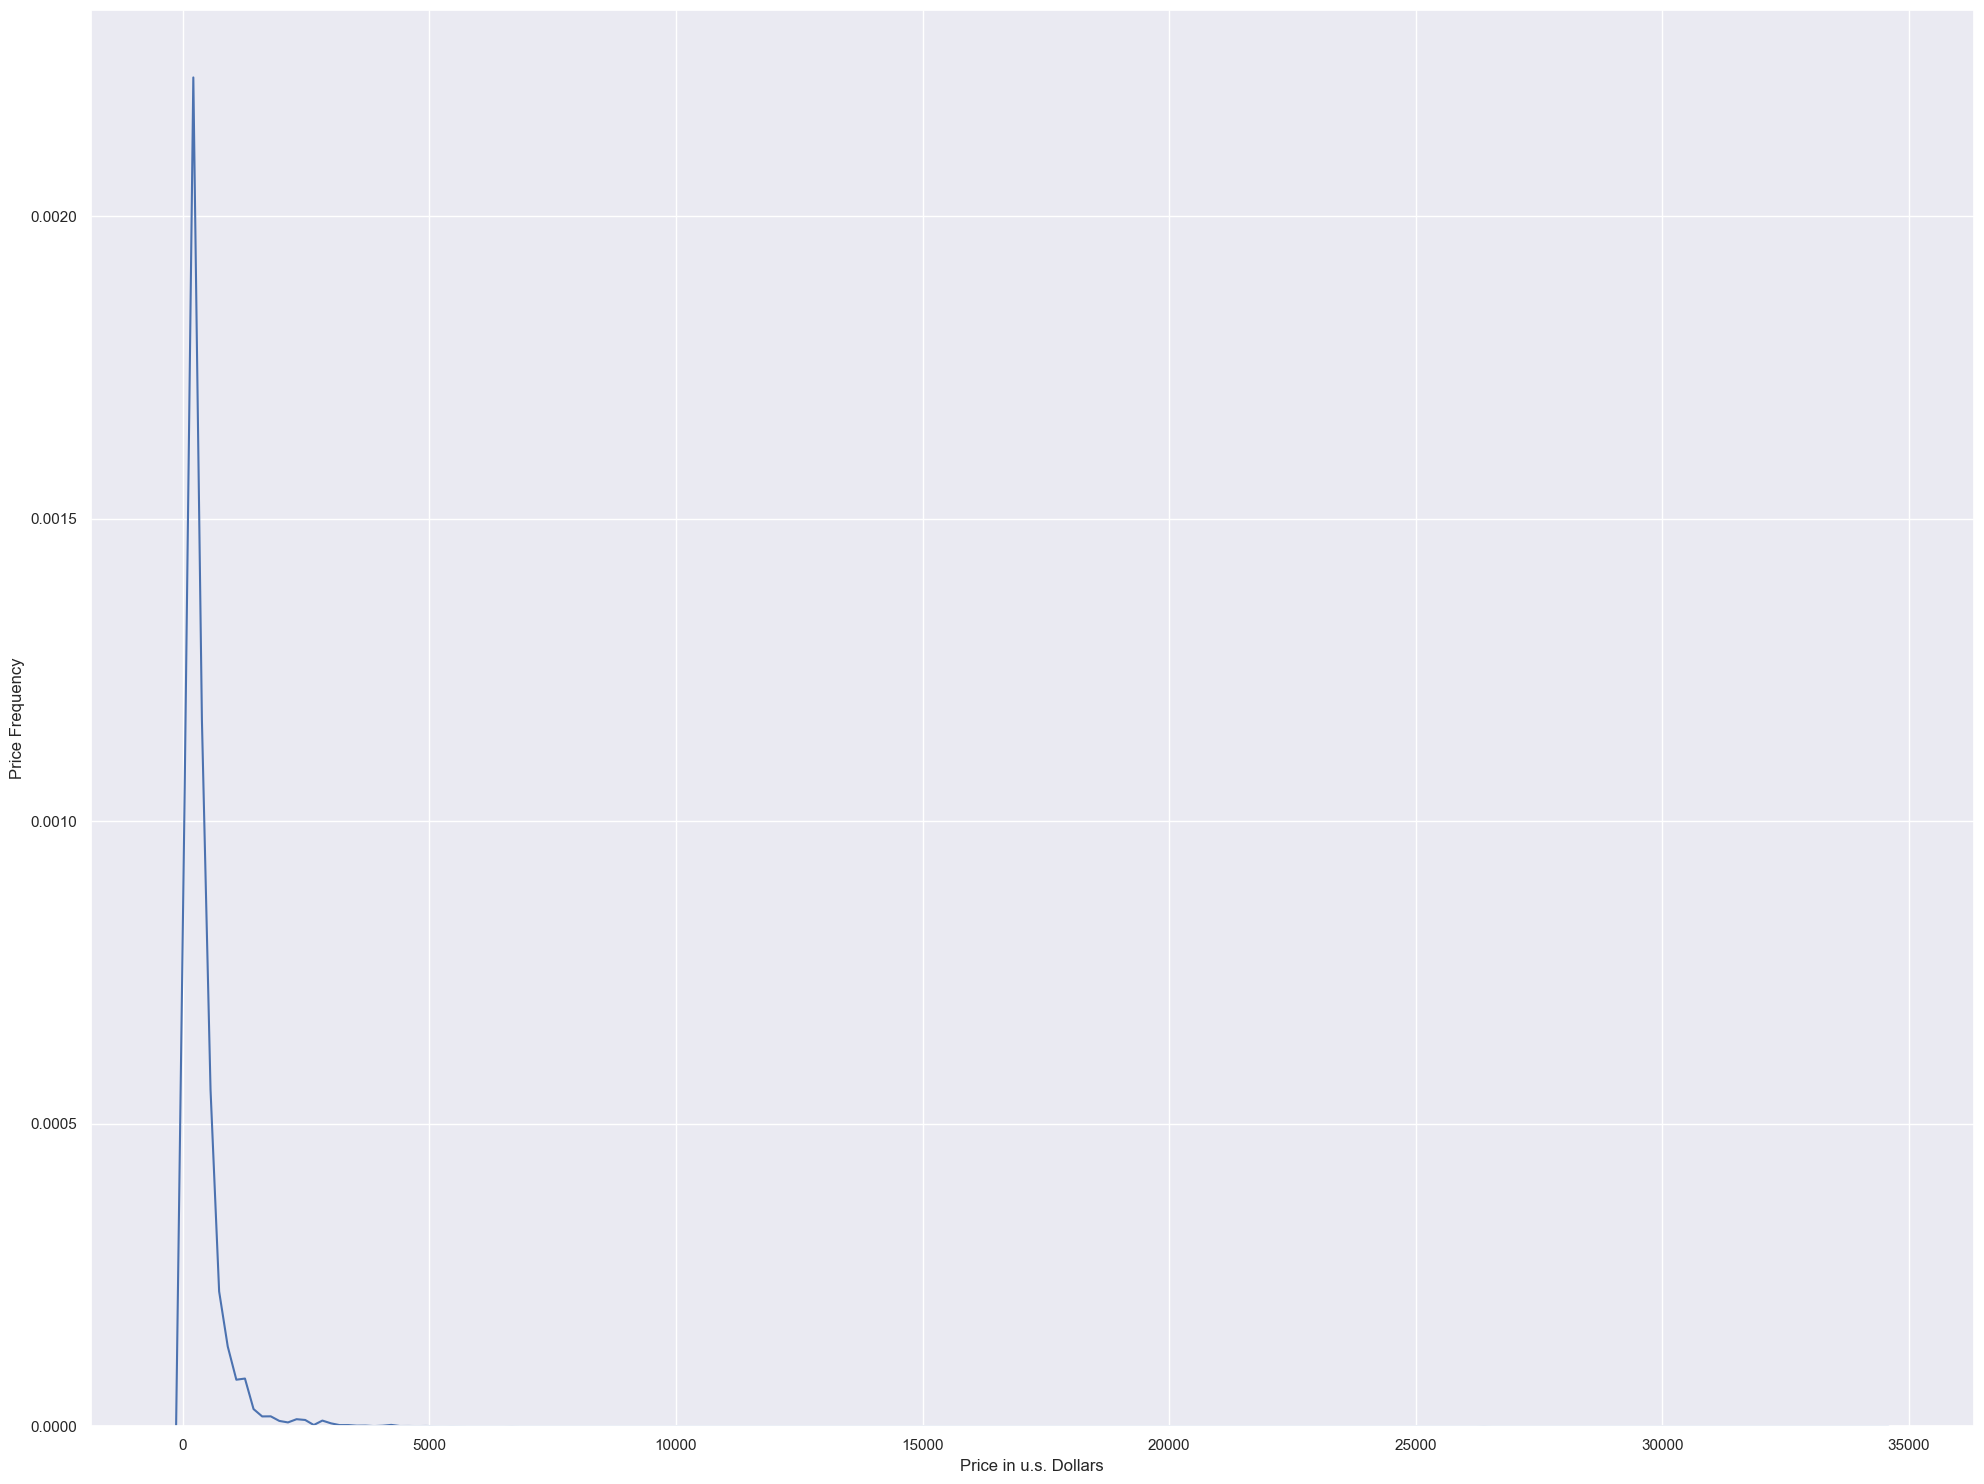

In [16]:
# Visualize prize distribution
plt. figure(figsize=(20,15))

sns.kdeplot(data = data, x = "Price_USD")

plt.xlabel("Price in u.s. Dollars")
plt.ylabel("Price Frequency")

plt.tight_layout()
plt.show();plt.close()

In [17]:
# Target Gender Analysis
data["Target_Gender"].value_counts()

f    47379
m      364
Name: Target_Gender, dtype: int64

In [18]:
data["Target_Gender"].value_counts(normalize = True)

f    0.992376
m    0.007624
Name: Target_Gender, dtype: float64

### Univariate Analysis

### Observation
The Female gender significantly out perform the male gender meaning the female bought more of the Jewelry than the male.

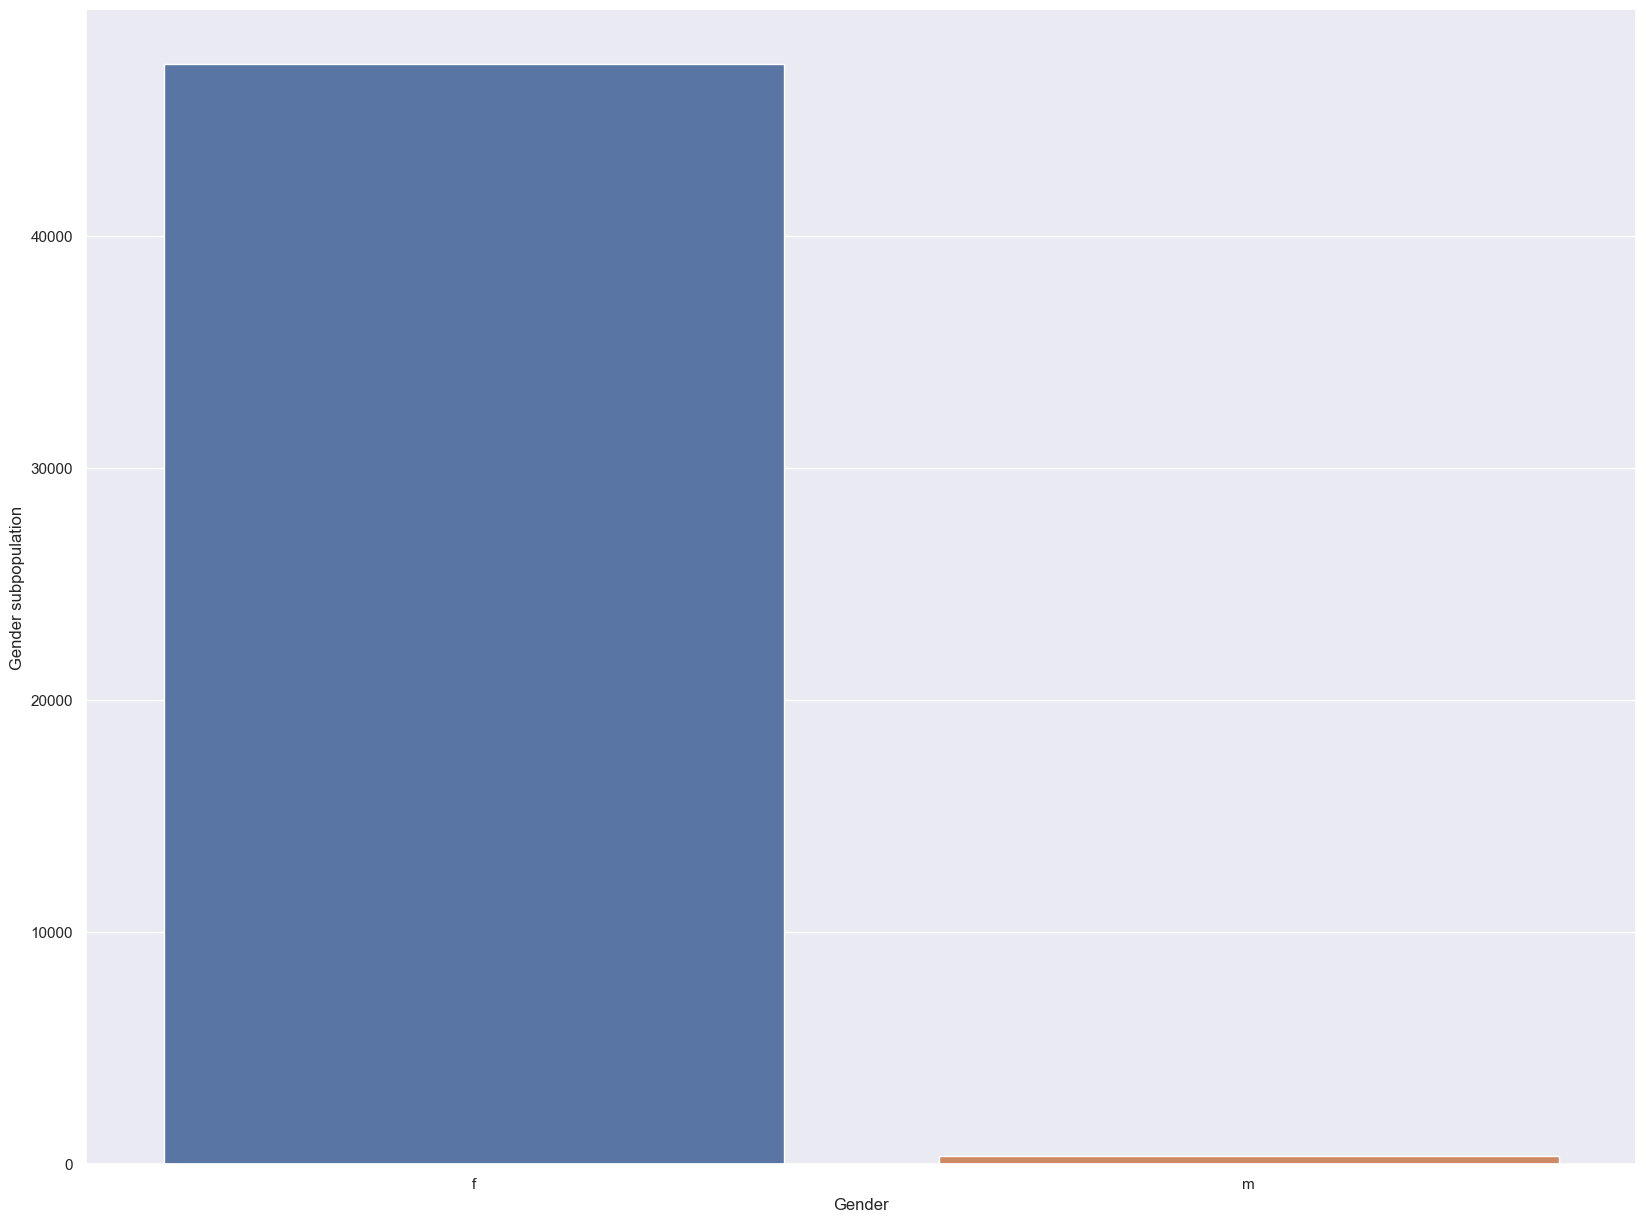

In [19]:
# Visualize Target Gender
plt. figure(figsize=(20,15))

sns.countplot(data = data, x = "Target_Gender")

plt.xlabel("Gender")
plt.ylabel("Gender subpopulation")

plt.show();plt.close()

In [20]:
# Jewelry category Analysis
data["Category"].value_counts()

jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0                    4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: Category, Length: 218, dtype: int64

### Observation
From above certain Categories does not make sense .This could be as a result of corrupt data or errors

In [21]:
# To get a better understanding of the data
data["Category"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.9', '380.1', '357.49', '15.47', '135.33', '719.75',
       '93.01', '177.95', 'jewelry.stud', '102.1', '595.75', '469.56',
       '427.07', '53.62', '77.53', '1469.18', '355.27', '184.89',
       '154.66', '300.58', '83.73', '271.19', '3294.21', '278.04',
       '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22', '124.88',
       '89.73', '171.23', '136.93', '19.04', '158.77', '187.1', '151.92',
       '1845.89', '87.23', '248.58', '596.48', '208.88', '193.11',
       '169.84', '1447.68', '45.07', '136.85', '282.05', '61.51',
       '210.21', '137.12', '1

In [22]:
# Extract the actual categories from the data
categories = data["Category"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and "jewelry" in c]

In [23]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [24]:
# pick out authentic data based on categories
real_categories = data.loc[data["Category"].isin(categories)]

In [25]:
# percentage of the missing values
100*data.isnull().sum()/len(data)

Order_Datetime     0.000000
Order_ID           0.000000
Product_id         0.000000
SKU_Quantity       0.000000
Category_ID        5.580231
Category          10.356584
Brand_ID           4.989052
Price_USD          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_Color         7.986654
Main_Metal         5.694922
Main_Gem          35.510374
dtype: float64

In [26]:
# percentage of missing values
100*real_categories.isnull().sum()/len(real_categories)

Order_Datetime     0.000000
Order_ID           0.000000
Product_id         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category           0.000000
Brand_ID           4.309081
Price_USD          0.000000
User_ID            0.000000
Target_Gender     44.842029
Main_Color         2.656044
Main_Metal         0.110617
Main_Gem          24.232519
dtype: float64

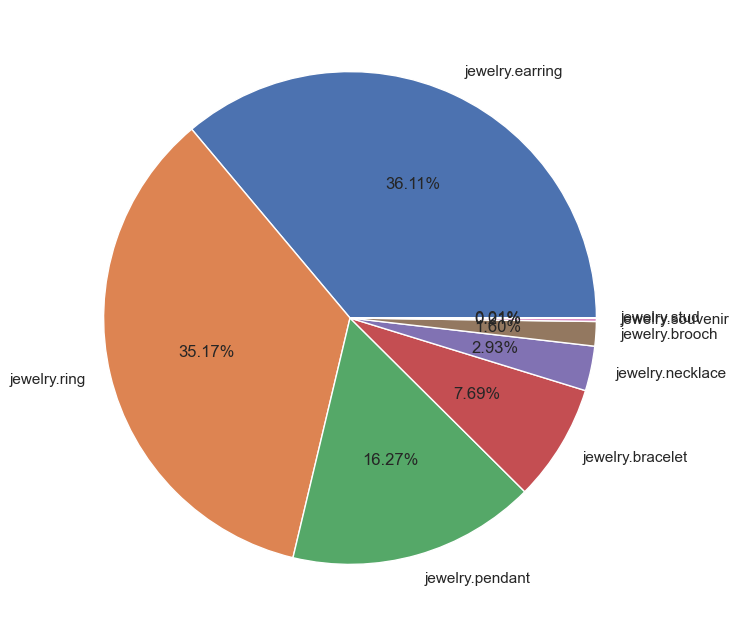

In [27]:
# Visualize Jewelry categories
subdata = real_categories["Category"].value_counts()

jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()

plt.figure(figsize=(12, 8))

plt.pie(x = counts, labels = jewelry_categories, autopct=lambda p:f'{p:.2f}%')

plt.show(); plt.close()

In [28]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variables.
# This function takes the numerical column as the input and retrurns the boxplots and histograms for the variable.
# Let see if this help us write faster and clearer code.

def histogram_boxplot(feature, figsize=(25,15), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (20,12))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grids=2
                                          sharex = True, # x-axis will be shared among all subplots
                                          gridspec_kw = {"height_ratios": (.25, .75)},
                                          figsize = figsize
                                          )# creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean of the column
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2)# for histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--')# Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') #Add median to the histogram


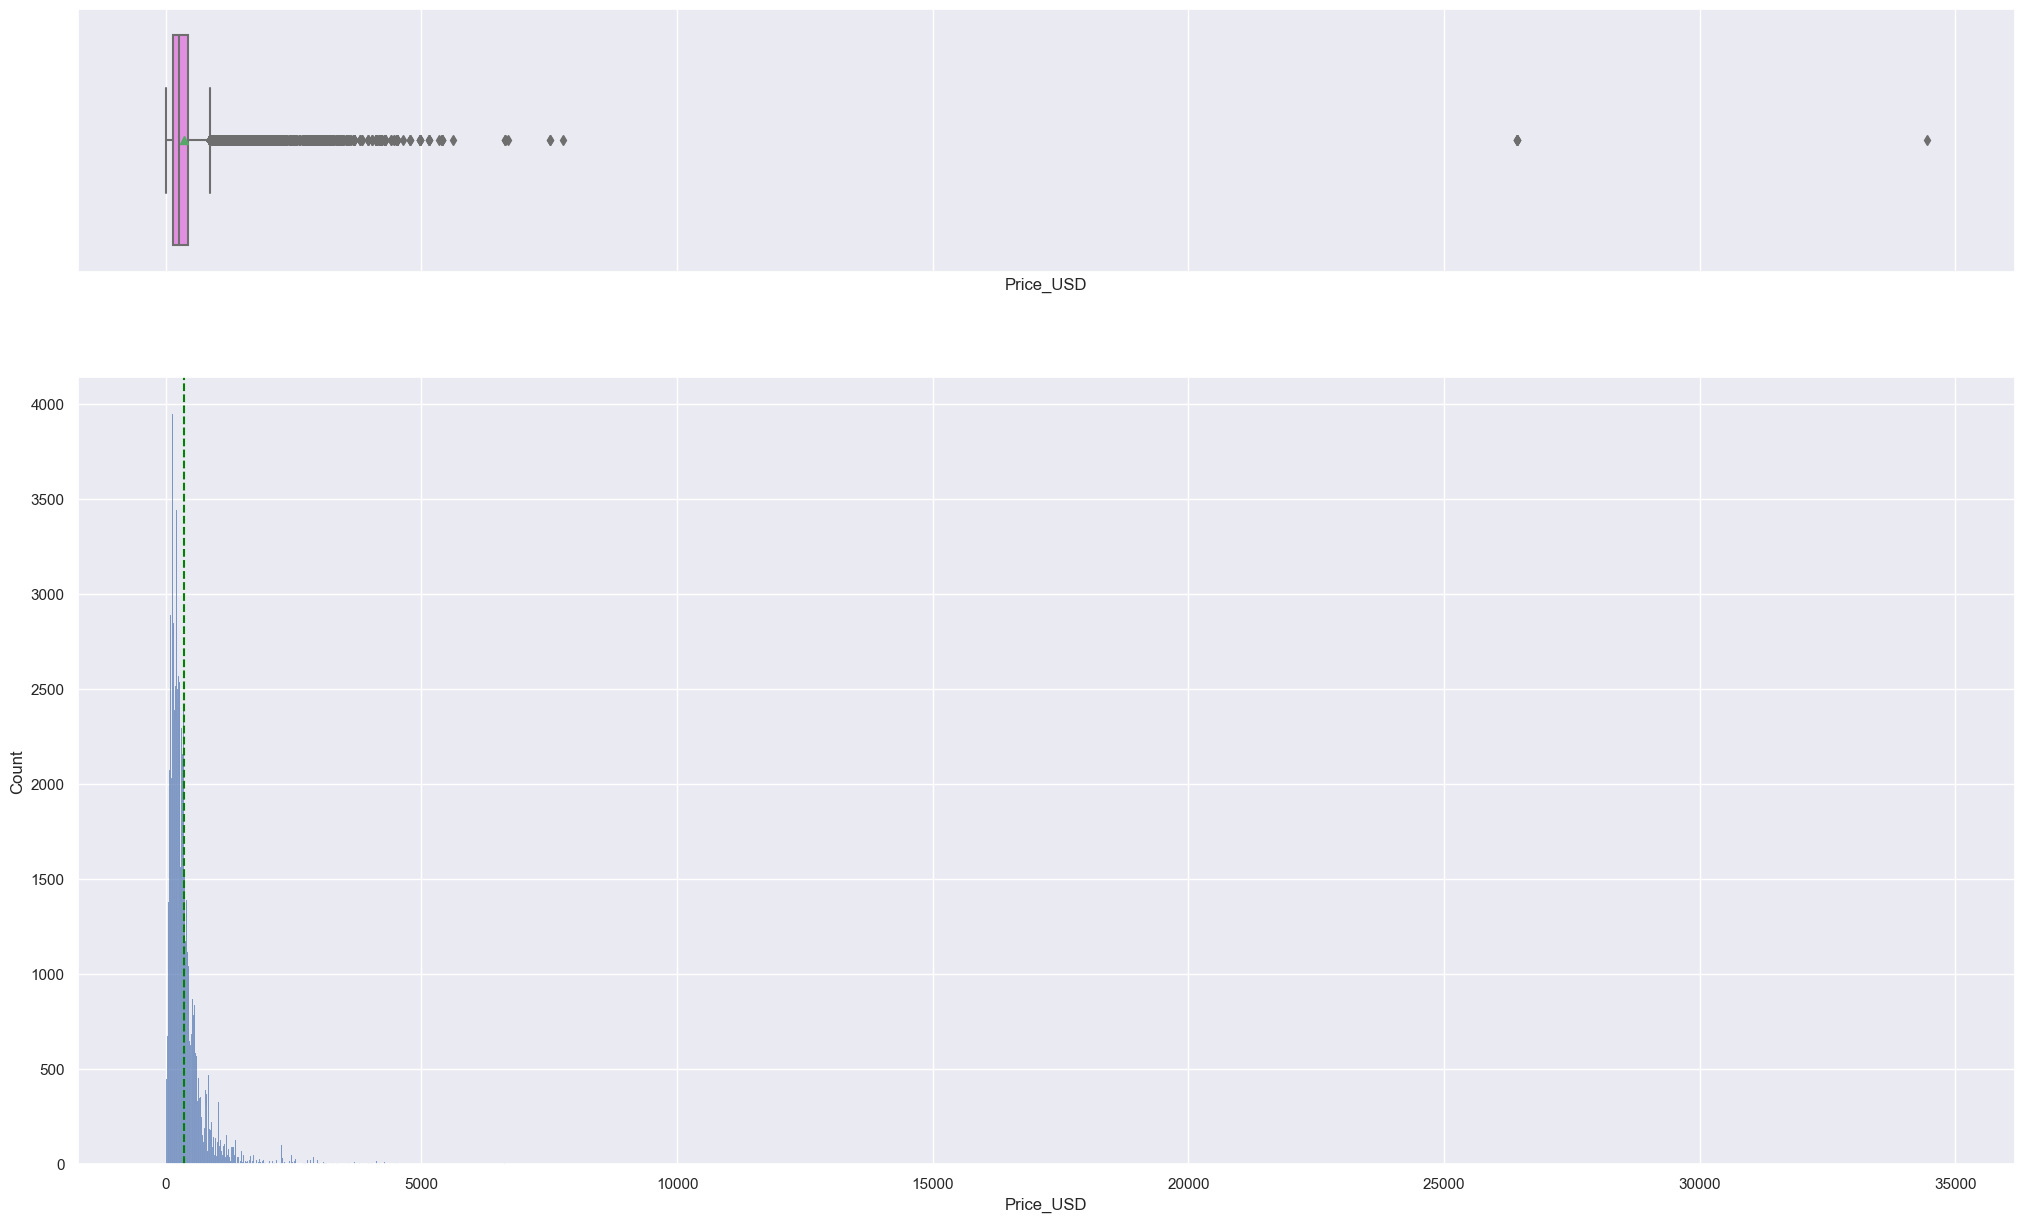

In [29]:
# check for outliers
histogram_boxplot(data['Price_USD'])

### Observation
The outliers in the "Price_USD" indicate incorrect data entries also it could represent rare, customized or high value pieces

### Bivariate

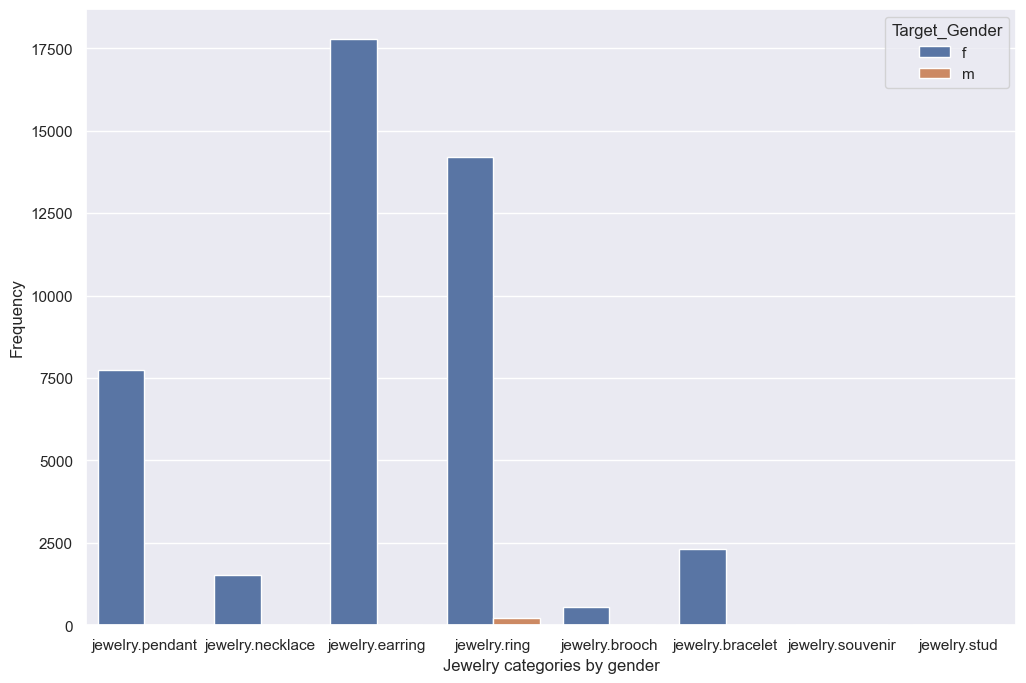

In [30]:
# Jewelry category by Gender
plt. figure(figsize=(12,8))

sns.countplot(data = real_categories, x = "Category", hue ="Target_Gender")

plt.xlabel("Jewelry categories by gender")
plt.ylabel("Frequency")

plt.show();plt.close()

### Observation
The Rings and earrings are more frequent with women, this aligns with traditional jewelry trends

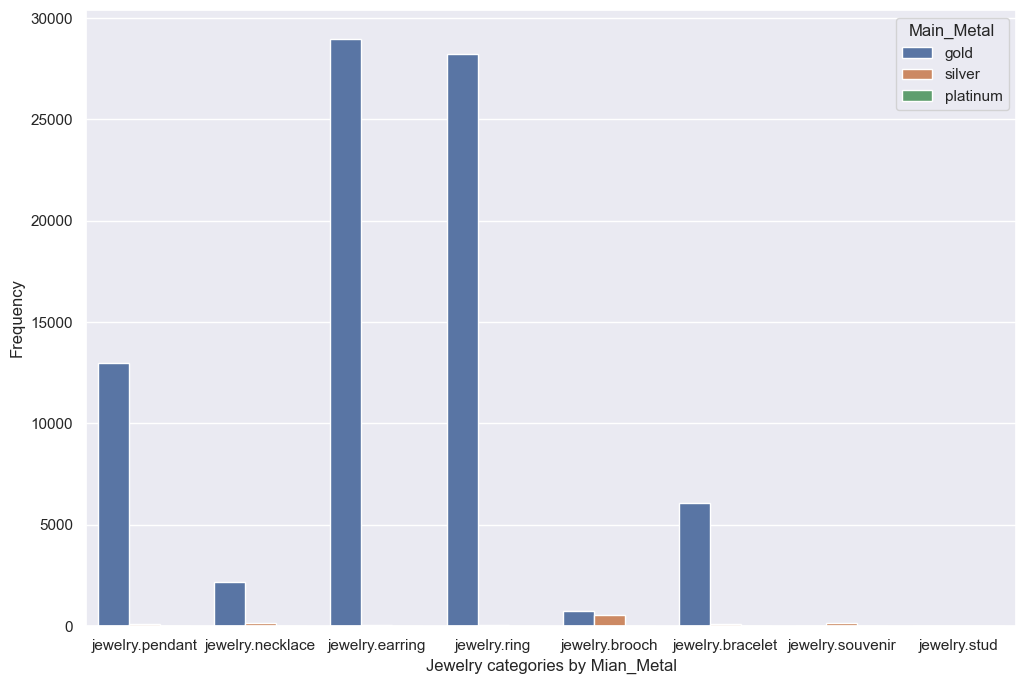

In [31]:
# Jewelry category by Gender
plt. figure(figsize=(12,8))

sns.countplot(data = real_categories, x = "Category", hue ="Main_Metal")

plt.xlabel("Jewelry categories by Mian_Metal")
plt.ylabel("Frequency")

plt.show();plt.close()

### Observation
The following jewelry in the other earring, ring pendant are most popular amongst male and female while the Brooch, souvenir indicate niche market

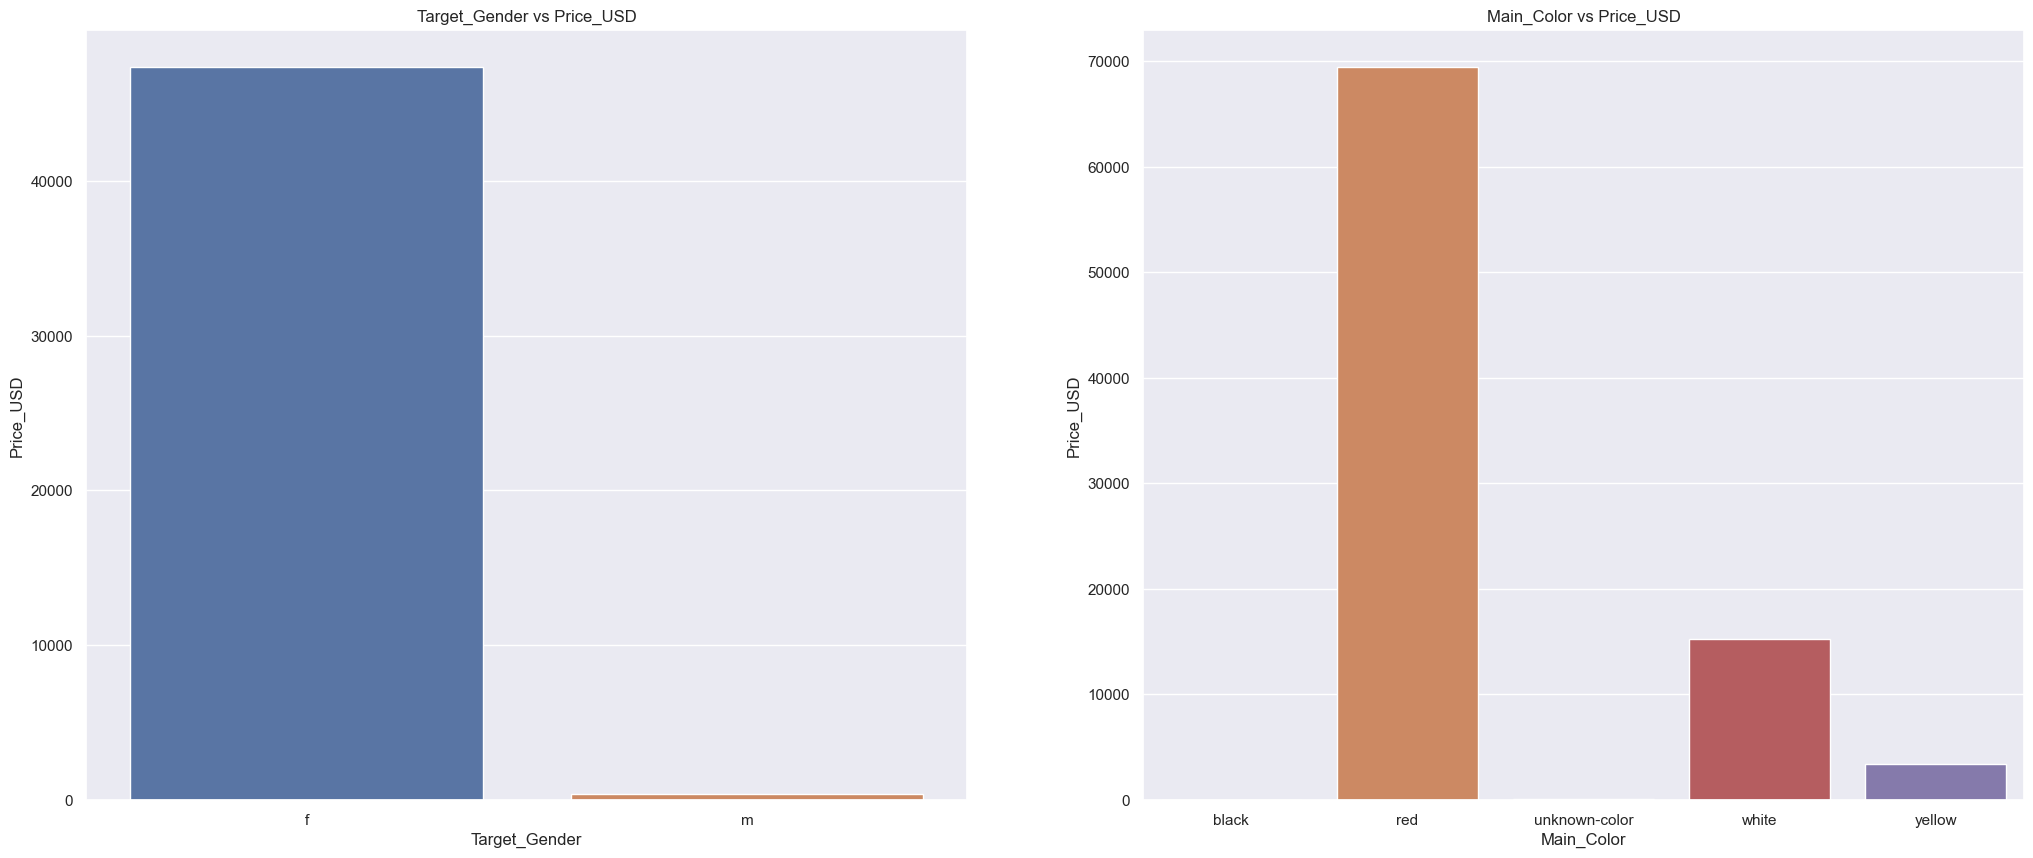

In [32]:
# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))  # Adjusted figure size

# Data Aggregation for Target_Gender vs. Price_USD
Target_Gender_Price_USD = data.groupby("Target_Gender")["Price_USD"].count().reset_index()

# Plot Target_Gender vs. Price_USD
sns.barplot(x="Target_Gender", y="Price_USD", data=Target_Gender_Price_USD, ax=axs[0])
axs[0].set_title("Target_Gender vs Price_USD")

# Data Aggregation for Brand_ID vs. Price_USD
Main_Color_Price_USD = data.groupby("Main_Color")["Price_USD"].count().reset_index()

# Plot Brand_ID vs. Price_USD
sns.barplot(x="Main_Color", y="Price_USD", data=Main_Color_Price_USD, ax=axs[1])
axs[1].set_title("Main_Color vs Price_USD")

# Show plots
plt.show()

### Observation
It seems more jewelry items are targeted towards the female than the male.Also it means more jewelry items are available and sold in Red.

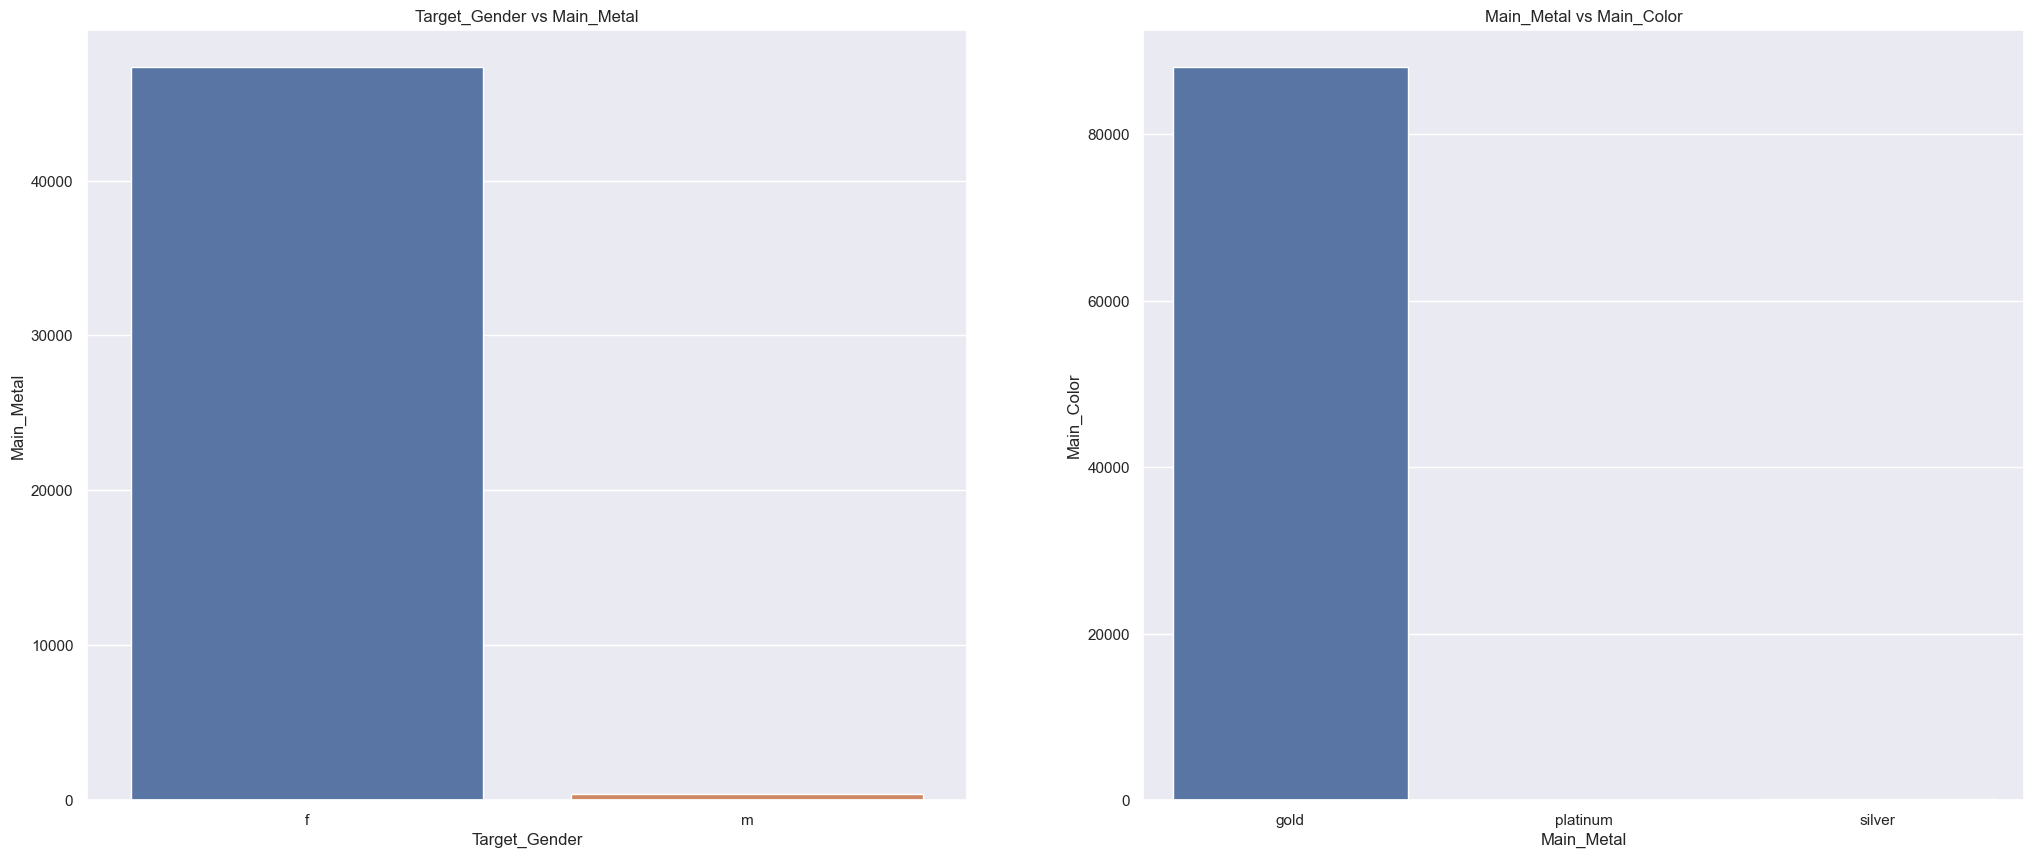

In [33]:
# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))  # Adjusted figure size

# Data Aggregation for Target_Gender vs. Main_Metal
Target_Gender_Main_Metal = data.groupby("Target_Gender")["Main_Metal"].count().reset_index()

# Plot Target_Gender vs. Main_Metal
sns.barplot(x="Target_Gender", y="Main_Metal", data=Target_Gender_Main_Metal, ax=axs[0])
axs[0].set_title("Target_Gender vs Main_Metal")

# Data Aggregation for Main_Metal vs. Main_Color
Main_Metal_Main_Color = data.groupby("Main_Metal")["Main_Color"].count().reset_index()

# Plot Main_Metal vs. Main_Color
sns.barplot(x="Main_Metal", y="Main_Color", data=Main_Metal_Main_Color, ax=axs[1])
axs[1].set_title("Main_Metal vs Main_Color")

# Show plots
plt.show()

### Observation
The female purchased more accross the various metal while in column 2 the gold has the more colors than the other metals.Both visualization indicate that the Gold is the most used metal for women

### Multivariate

<Axes: xlabel='Main_Metal', ylabel='Price_USD'>

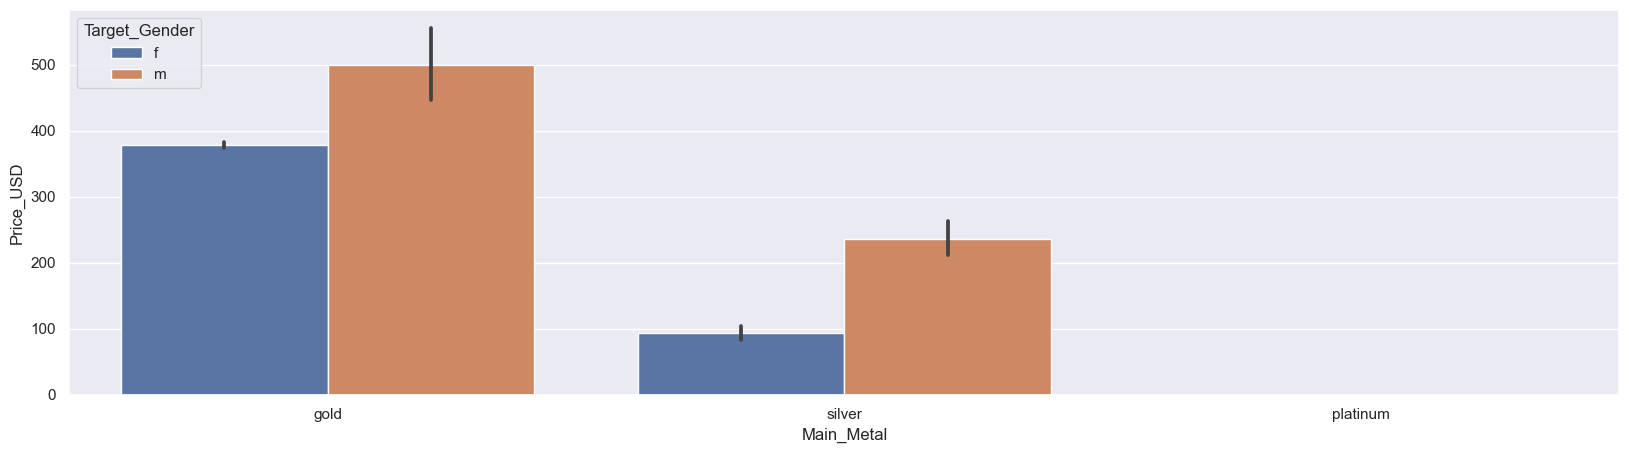

In [34]:
plt.figure(figsize=(20,5))
sns.barplot(x='Main_Metal', y='Price_USD', data=data, hue='Target_Gender')

### Observation
The male Gender seems to purchase the Gold and silver(Main_Metal) more than the female.Emphasies should be placed on making the distribution betwen Male and Female even

<Axes: xlabel='Main_Color', ylabel='Price_USD'>

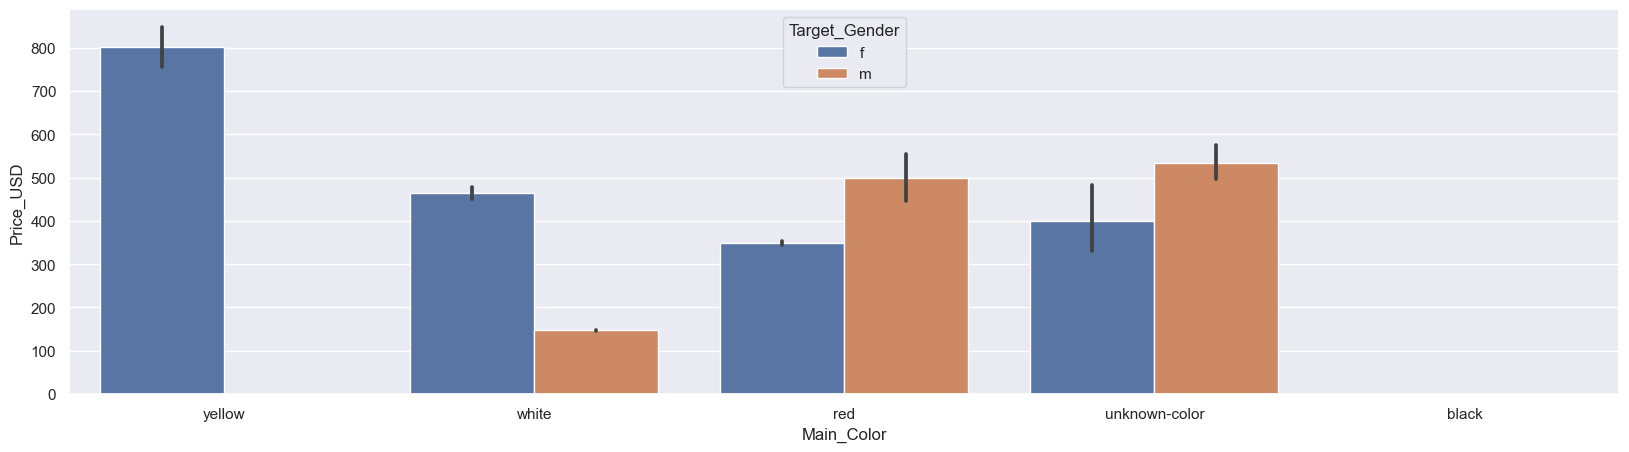

In [35]:
plt.figure(figsize=(20,5))
sns.barplot(x='Main_Color', y='Price_USD', data=data, hue='Target_Gender')

### Observation
The Female Gender prefered the yellow  than the rest colors hence thew price was significantly higher than the others

<Axes: xlabel='Main_Color', ylabel='Price_USD'>

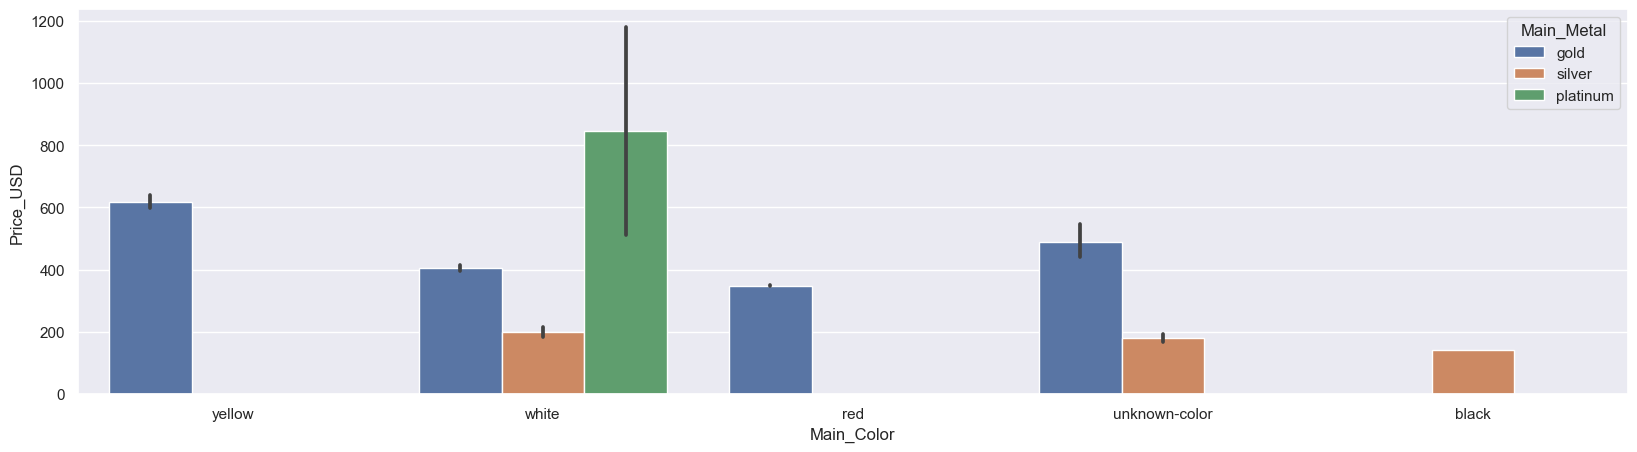

In [36]:
plt.figure(figsize=(20,5))
sns.barplot(x='Main_Color', y='Price_USD', data=data, hue='Main_Metal')

### Observation
The price of the platinum which indicate premium pricing while the price of Gold is higher than silver and indication of traditional metal value

<Axes: xlabel='Main_Metal', ylabel='Price_USD'>

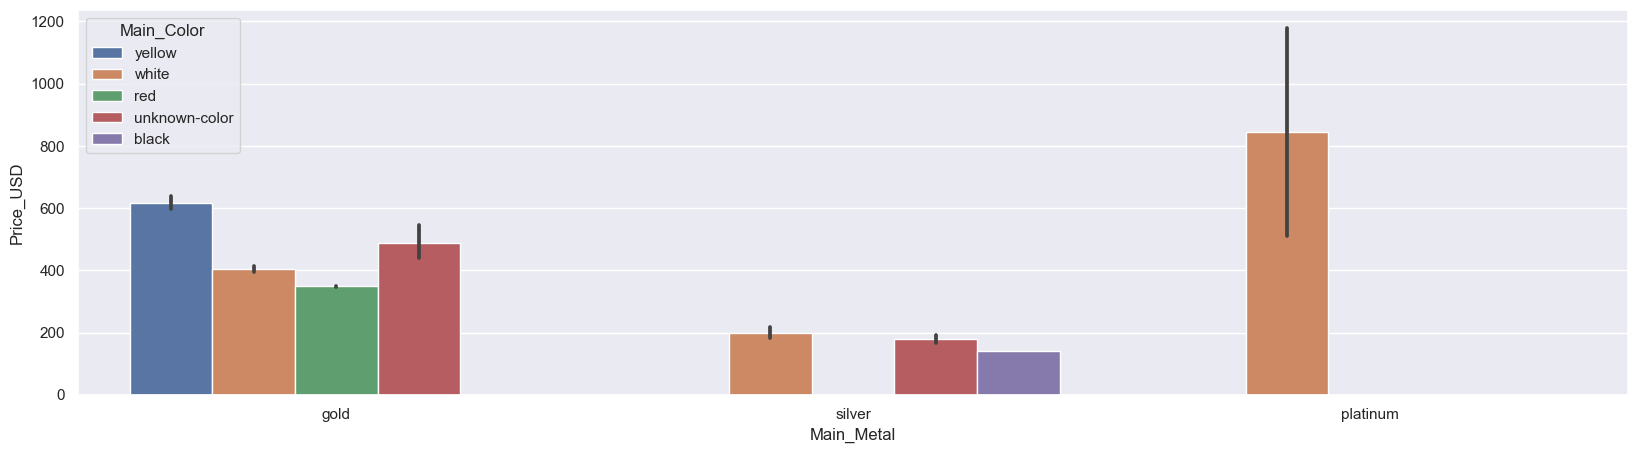

In [37]:
plt.figure(figsize=(20,5))
sns.barplot(x='Main_Metal', y='Price_USD', data=data, hue='Main_Color')

### Obersation
Gold has four different colors meaning there are various options for gold than the rest Metals. Obvously more money to be made from the sales of Gold.The colors of the gold are linked to high prices.The Rare colors (black, blue) may indicate designer or specialty jewelry.

<Axes: xlabel='Main_Gem', ylabel='Price_USD'>

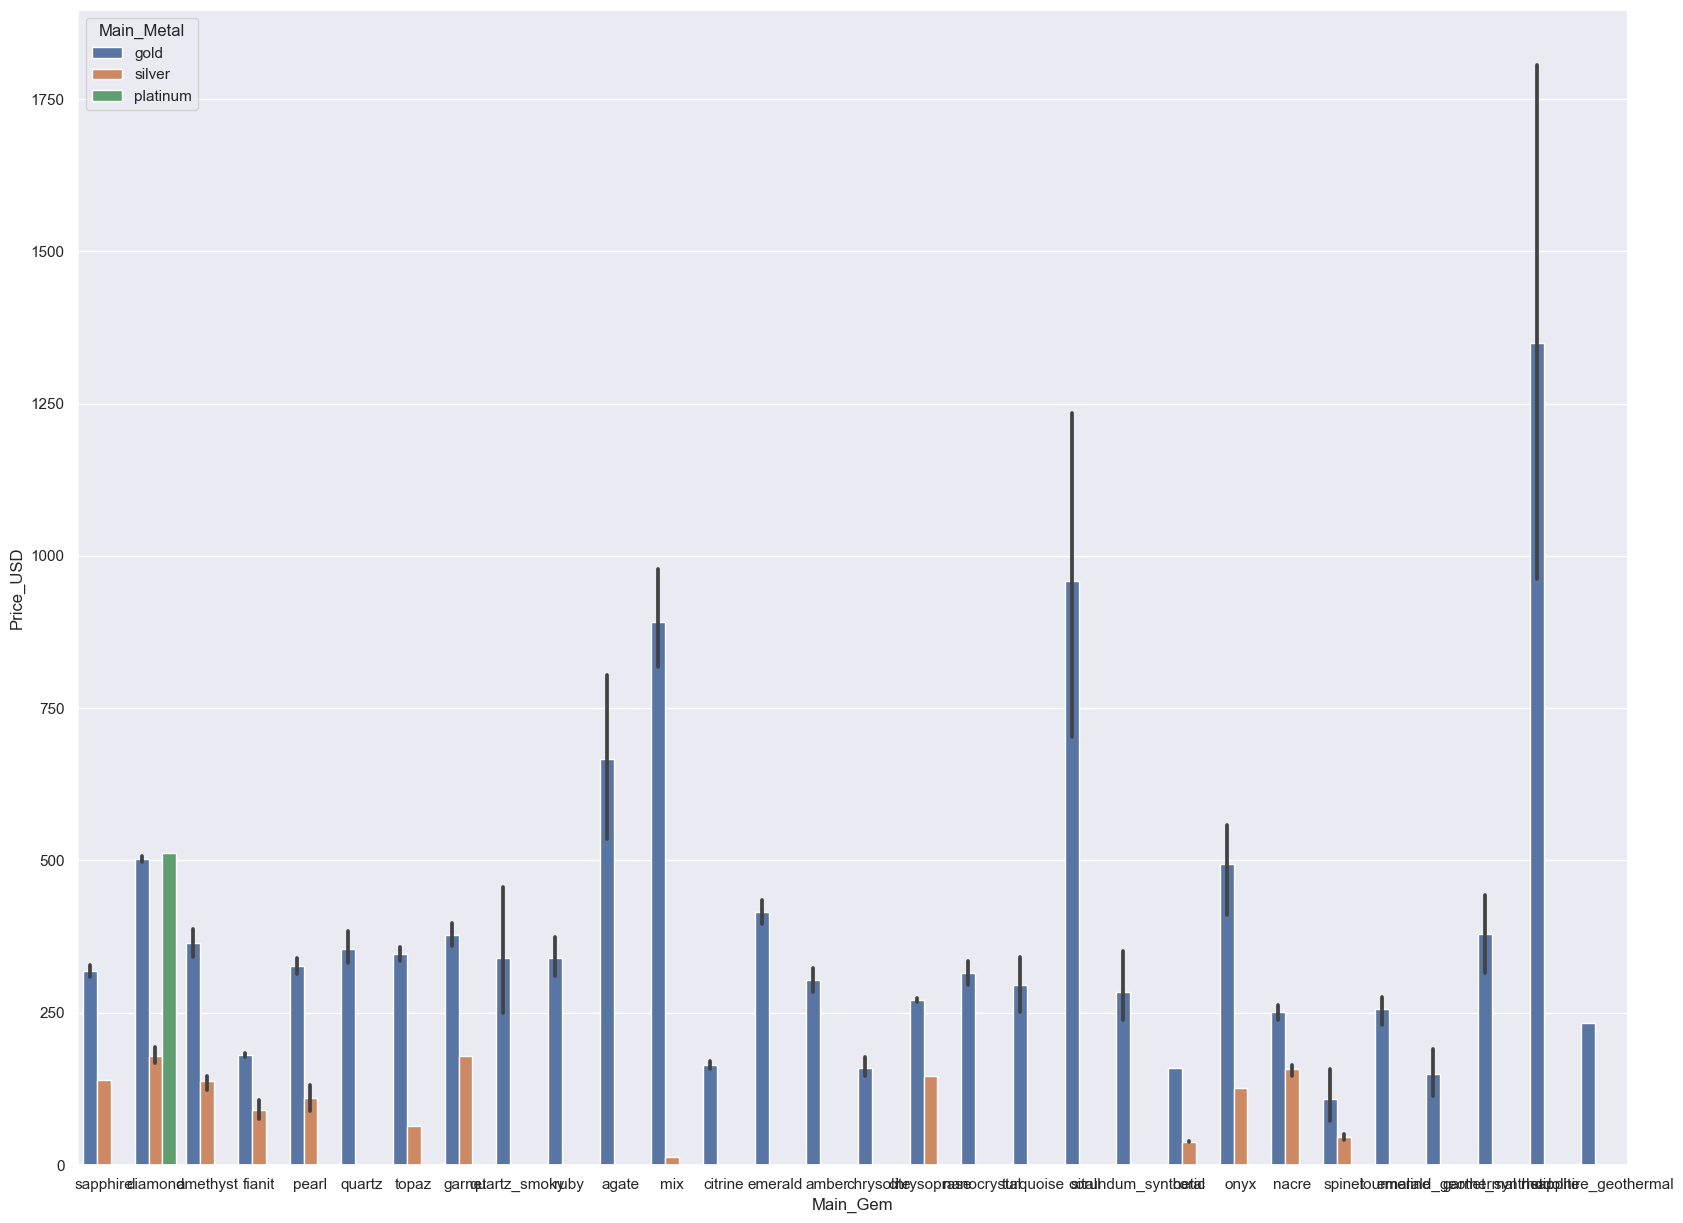

In [38]:
plt.figure(figsize=(20,15))
sns.barplot(x='Main_Gem', y='Price_USD', data=data, hue='Main_Metal')

<Axes: xlabel='Main_Metal', ylabel='Price_USD'>

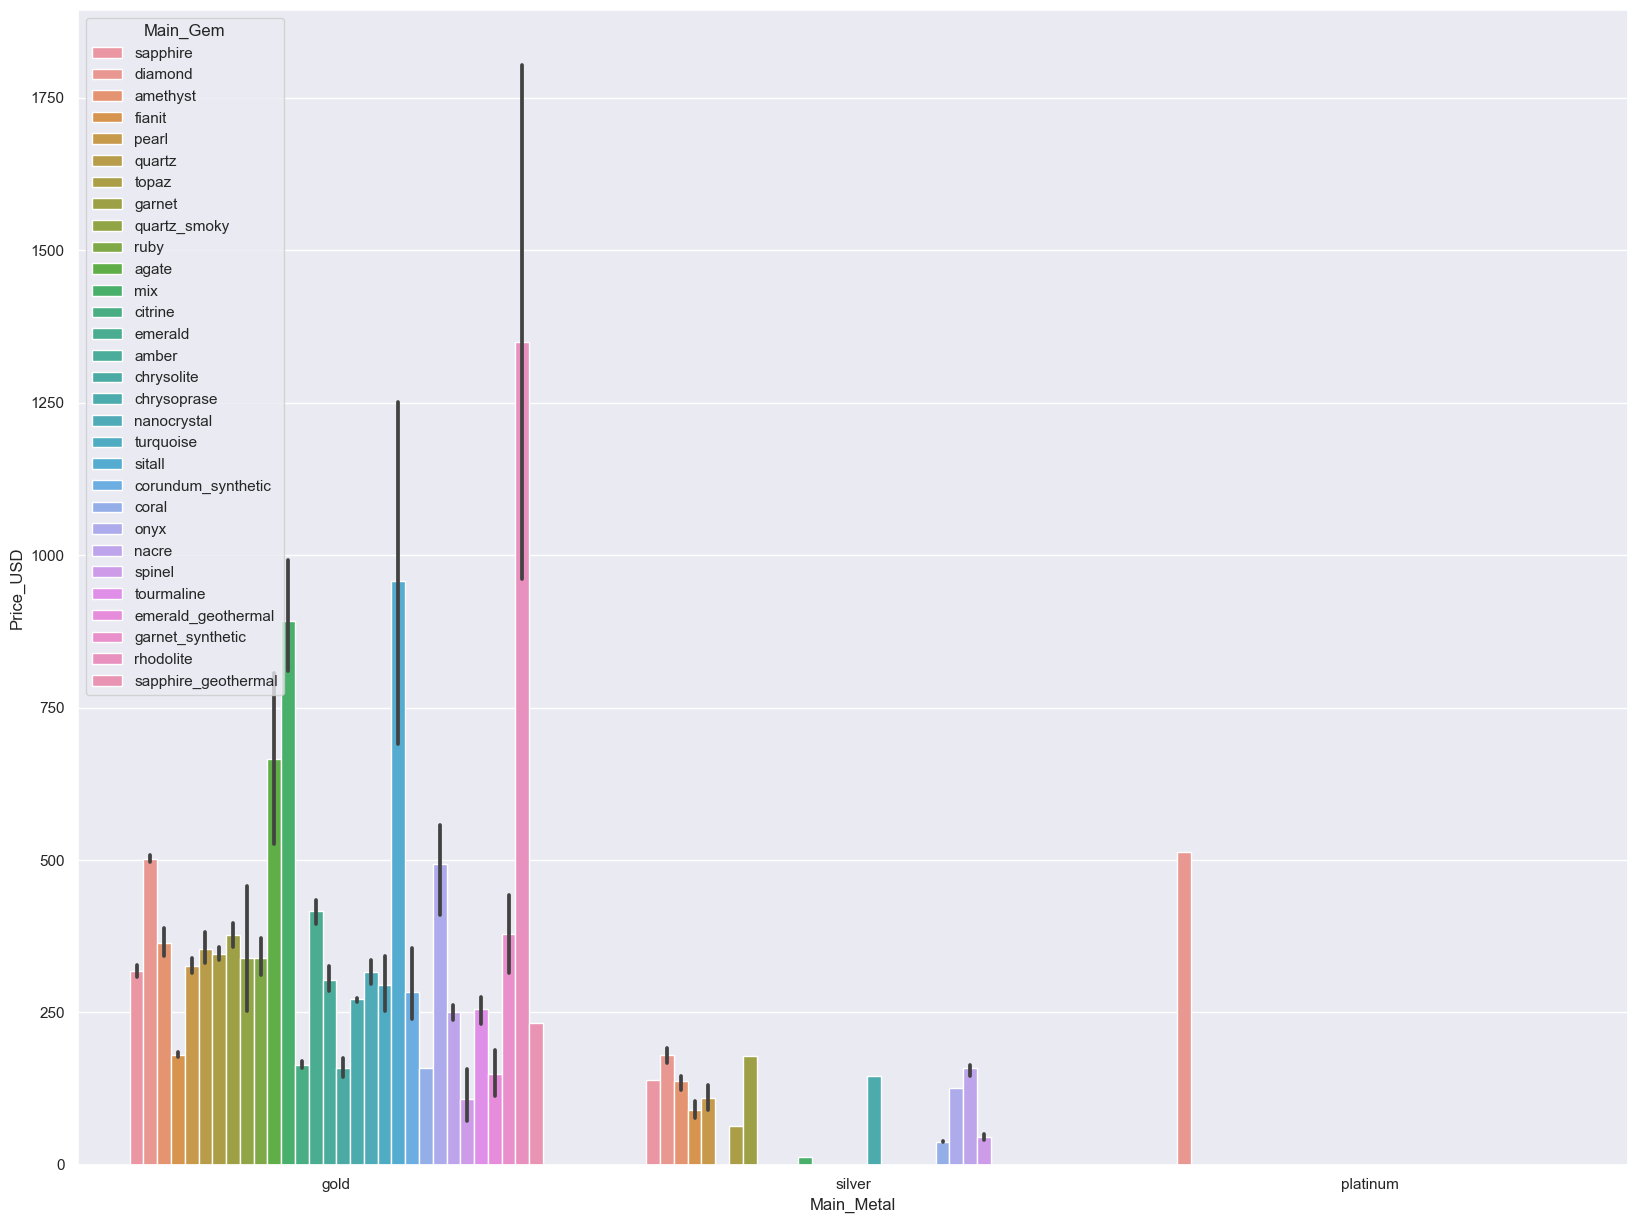

In [39]:
plt.figure(figsize=(20,15))
sns.barplot(x='Main_Metal', y='Price_USD', data=data, hue='Main_Gem')

### Observation
Gold Rhodolite gold seems to be the most purchased.

In [40]:
# Encode jewelry categories
encoded, category_code = pd.factorize(real_categories["Category"])
real_categories.loc[:, "Category"] = encoded

In [41]:
#encode the Gender
encoded, category_code = pd.factorize(real_categories["Target_Gender"])
real_categories.loc[:, "Target_Gender"] = encoded

In [42]:
# Encode the Gem
encoded, category_code = pd.factorize(real_categories["Main_Gem"])
real_categories.loc[:, "Main_Gem"] = encoded

In [43]:
# Encode the color
encoded, category_code = pd.factorize(real_categories["Main_Color"])
real_categories.loc[:, "Main_Color"] = encoded

In [44]:
# Encode the Metal
encoded, category_code = pd.factorize(real_categories["Main_Metal"])
real_categories.loc[:, "Main_Metal"] = encoded

In [45]:
real_categories

,Order_Datetime,Order_ID,Product_id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1.925510e+18,1.842210e+18,1,1.806830e+18,0,1.0,54.66,1.515920e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1.925630e+18,1.835570e+18,1,1.806830e+18,0,0.0,88.90,1.515920e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1.925740e+18,1.873940e+18,1,1.806830e+18,1,0.0,417.67,1.515920e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1.925760e+18,1.835570e+18,1,1.806830e+18,2,1.0,102.27,1.515920e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1.925760e+18,1.600020e+18,1,1.806830e+18,2,0.0,150.55,1.515920e+18,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95900,2021-12-01 09:32:35 UTC,2.719010e+18,1.956660e+18,1,1.806830e+18,3,0.0,145.62,1.515920e+18,-1,1,0,-1
95903,2021-12-01 09:37:28 UTC,2.719010e+18,1.956660e+18,1,1.806830e+18,2,0.0,301.23,1.515920e+18,-1,1,0,2
95907,2021-12-01 09:52:06 UTC,2.719020e+18,1.956660e+18,1,1.806830e+18,2,1.0,630.00,1.515920e+18,0,0,0,1
95908,2021-12-01 09:55:35 UTC,2.719020e+18,1.835570e+18,1,1.806830e+18,2,0.0,83.42,1.515920e+18,-1,0,0,3


In [46]:
real_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80458 entries, 1 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  80458 non-null  object 
 1   Order_ID        80458 non-null  float64
 2   Product_id      80458 non-null  float64
 3   SKU_Quantity    80458 non-null  int64  
 4   Category_ID     80458 non-null  float64
 5   Category        80458 non-null  int64  
 6   Brand_ID        76991 non-null  float64
 7   Price_USD       80458 non-null  float64
 8   User_ID         80458 non-null  float64
 9   Target_Gender   80458 non-null  int64  
 10  Main_Color      80458 non-null  int64  
 11  Main_Metal      80458 non-null  int64  
 12  Main_Gem        80458 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 8.6+ MB


In [47]:
# feature correlation
correlations =real_categories.drop(labels = ["Order_Datetime", "User_ID", "Order_ID", "Product_id"], axis=1).corr(method="spearman") 

In [48]:
correlations

,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,0.022894,-0.012950,0.027919,0.040773,0.051492,0.185724,0.035895
Category,NaN,0.022894,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,NaN,-0.012950,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_USD,NaN,0.027919,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Target_Gender,NaN,0.040773,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Color,NaN,0.051492,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_Metal,NaN,0.185724,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_Gem,NaN,0.035895,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


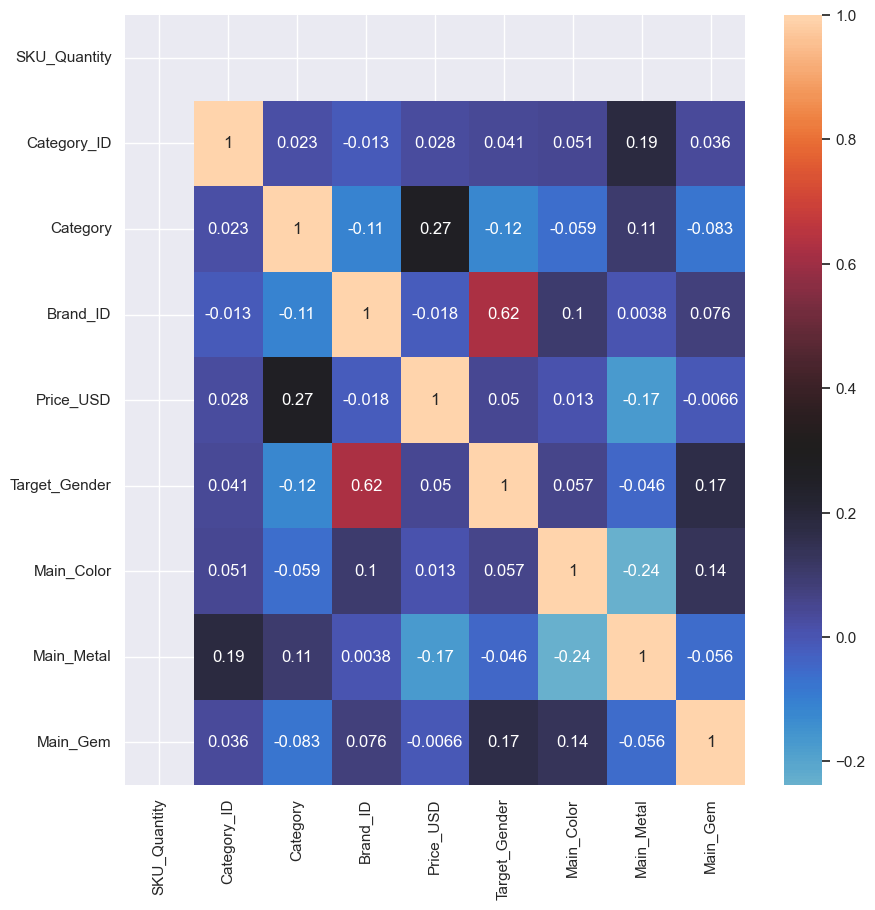

In [49]:
# correlation heatmap
plt.figure(figsize=(10, 10))

sns.heatmap(correlations, annot = True,center = .3)

plt.show(); plt.close()

In [50]:
# setting the limits
upper = 1
lower =.2

In [51]:
#explicitly obtain correlation features
correlated_columns = {
    column: correlations[(correlations[column] >lower) & (upper >correlations[column])].index.tolist()
    for column in correlations.columns
}

In [52]:
correlated_columns

{'SKU_Quantity': [],
 'Category_ID': [],
 'Category': ['Price_USD'],
 'Brand_ID': ['Target_Gender'],
 'Price_USD': ['Category'],
 'Target_Gender': ['Brand_ID'],
 'Main_Color': [],
 'Main_Metal': [],
 'Main_Gem': []}

### Data implications
#### Findings from the data:
#### 1.Missing values:There were alot of missing values from most of the columns. This can be fixed by data imputation
#### 2. There were about 2955 duplicated values
#### 3. Data corruption: some variables (e.g. jewelry_category) contain corrupt values
#### 4. Target skew:The target variable is highly right skewed. This can present an issue during traing
#### 5.Correlations: for the most part, the features have low multicolinearity

### Data preparation
### Based on the data implication the following steps will be experimented upon for the data preparation stage
1. missing values:The missing value will be treated via an algorithmic method. SimpleImputer.

2. Feature Encoding:The categorical features will be encoded.

3. Target skew: The Target variable is strongly right_skewed

4.Redundant features: certain feature will be eliminated

In [53]:
# columns to eliminate
columns_to_eliminate = [
    "SKU_Quantity",
    "Order_ID",
    "Product_id",
    "User_ID",
    "Category_ID"
]

In [54]:
# Elimate used features
data.drop(labels = columns_to_eliminate, axis = 1, inplace = True)

In [55]:
data.shape

(95910, 8)

In [56]:
data.drop(labels = ["Order_Datetime"], axis = 1, inplace = True)

In [57]:
data.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [58]:
# Eliminate the unrealistic categories
data = data.loc[data["Category"].isin(categories), :]

In [59]:
data.shape

(80458, 7)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# Separate features from labels
X, y = data.drop(labels = ["Price_USD"], axis =1), data["Price_USD"]

In [62]:
# Create test and train split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .1)

In [63]:
X_train

,Category,Brand_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
29753,jewelry.ring,0.0,f,red,gold,fianit
29787,jewelry.ring,1.0,f,red,gold,amethyst
15356,jewelry.pendant,0.0,f,red,gold,garnet
29660,jewelry.bracelet,0.0,NaN,white,gold,fianit
83754,jewelry.earring,1.0,NaN,red,gold,fianit
...,...,...,...,...,...,...
12241,jewelry.ring,2.0,f,white,gold,diamond
42656,jewelry.earring,0.0,f,red,gold,NaN
31687,jewelry.ring,1.0,f,red,gold,topaz
22854,jewelry.ring,0.0,NaN,red,gold,NaN


In [64]:
y_train

29753    347.81
29787    123.15
15356    143.70
29660    262.88
83754    132.74
          ...  
12241    349.18
42656    130.00
31687    246.44
22854    119.77
16137    171.10
Name: Price_USD, Length: 72412, dtype: float64

### Data Modelling

1. Linear Regression,
2. Random Forest
3. Ada Boosting (AdaBoost) and 
4. Catboost

### 1. Encode categorical features
### 2. Account for target skew
### 3. Fix missing values

In [65]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline

In [66]:
# customize the pipeline
def generate_pipeline(model, column_indices, categorical_indices, fill_missing = True, one_hot = True, label_encode = False):
    first_transformer = ColumnTransformer(
    transformers = [
        ("imputer", SimpleImputer(strategy = "most_frequent"), column_indices)
    ],
    remainder = "passthrough",
    sparse_threshold = 0.
   )
    
    second_transformer = ColumnTransformer(
         transformers = [
             ("one_hot", OneHotEncoder(), categorical_indices)
         ],
         remainder = "passthrough",
         sparse_threshold = 0.
    )
    third_transformer = ColumnTransformer(
        transformers = [
            ("ordinal", OrdinalEncoder(), categorical_indices)
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )
    
    steps = []
    
    if fill_missing:
        steps.append(("impute", first_transformer))
        
    if label_encode:
        steps.append(("second", third_transformer))
    if one_hot:
        steps.append(("second", second_transformer))
    steps.append(("model", model))
    model_pipe = Pipeline(steps = steps)
    return model_pipe

In [67]:
X.head()

,Category,Brand_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,jewelry.pendant,1.0,f,white,gold,sapphire
2,jewelry.pendant,0.0,f,red,gold,diamond
3,jewelry.necklace,0.0,NaN,red,gold,amethyst
4,jewelry.earring,1.0,NaN,red,gold,NaN
5,jewelry.earring,0.0,NaN,red,gold,diamond


In [68]:
# Generate indices
columns = X.columns.tolist()

column_indices = [columns.index(c) for c in columns]
categorical_features = [c for c in columns if c not in ["Brand_ID"]]
categorical_indices = [columns.index(c) for c in categorical_features]  # Fixed

In [69]:
categorical_indices

[0, 2, 3, 4, 5]

In [70]:
# CatBoost pipeline
cat_pipe = generate_pipeline(
    CatBoostRegressor(loss_function ="RMSE", iterations = 10000, learning_rate = 0.1, one_hot_max_size = 2),
    column_indices,
    categorical_indices,
    fill_missing = False, one_hot = False, label_encode = True
)

In [71]:
# LR pipeline
lin_pipe = generate_pipeline(
    LinearRegression(),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [72]:
# AdaBoost pipeline

ada_pipe = generate_pipeline(
    AdaBoostRegressor(loss = "exponential", n_estimators = 1000, learning_rate=.01),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [73]:
# ExtraTreeRegressor pipeline

ada_pipe = generate_pipeline(
    ExtraTreesRegressor(criterion = "friedman_mse", n_estimators = 1000, bootstrap=True),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [74]:
from sklearn.preprocessing import PowerTransformer
# Define the base regressor (ExtraTreesRegressor)
extra_pipe = ExtraTreesRegressor(n_estimators=100)

In [75]:
# Transform targets
cat_pipe = TransformedTargetRegressor(regressor = cat_pipe, transformer = PowerTransformer(method ="box-cox"))
ada_pipe = TransformedTargetRegressor(regressor = ada_pipe, transformer = PowerTransformer(method ="box-cox"))
lin_pipe = TransformedTargetRegressor(regressor = lin_pipe, transformer = PowerTransformer(method ="box-cox"))
extra_pipe = TransformedTargetRegressor(regressor = extra_pipe, transformer = PowerTransformer(method ="box-cox"))

In [76]:
# Fit the model for catBoost
cat_pipe.fit(X_train, y_train)  # Should work no

0:	learn: 0.9630076	total: 170ms	remaining: 28m 18s
1:	learn: 0.9247731	total: 196ms	remaining: 16m 18s
2:	learn: 0.8981217	total: 222ms	remaining: 12m 19s
3:	learn: 0.8705056	total: 241ms	remaining: 10m 2s
4:	learn: 0.8507547	total: 260ms	remaining: 8m 39s
5:	learn: 0.8347201	total: 273ms	remaining: 7m 34s
6:	learn: 0.8159494	total: 281ms	remaining: 6m 41s
7:	learn: 0.8001152	total: 289ms	remaining: 6m
8:	learn: 0.7898459	total: 297ms	remaining: 5m 29s
9:	learn: 0.7801410	total: 308ms	remaining: 5m 7s
10:	learn: 0.7700620	total: 317ms	remaining: 4m 47s
11:	learn: 0.7621956	total: 326ms	remaining: 4m 31s
12:	learn: 0.7555089	total: 335ms	remaining: 4m 17s
13:	learn: 0.7501093	total: 343ms	remaining: 4m 5s
14:	learn: 0.7453289	total: 350ms	remaining: 3m 52s
15:	learn: 0.7383525	total: 356ms	remaining: 3m 42s
16:	learn: 0.7338668	total: 364ms	remaining: 3m 33s
17:	learn: 0.7280823	total: 373ms	remaining: 3m 27s
18:	learn: 0.7245497	total: 381ms	remaining: 3m 20s
19:	learn: 0.7199709	tota

TransformedTargetRegressor(regressor=Pipeline(steps=[('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('ordinal',
                                                                                       OrdinalEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      <catboost.core.CatBoostRegressor object at 0x000002655D553350>)]),
                           transformer=PowerTransformer(method='box-cox'))

In [77]:
#fit LR
lin_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('impute',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      LinearRegression())]),
                           transformer=PowerTransformer(method='box-cox'))

In [78]:
# fit AdaBoost
ada_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('impute',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [79]:
# fit ExtraTrees
ada_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('impute',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [80]:
from lightgbm import LGBMRegressor

lgbm_pipe = generate_pipeline(
    LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=31),
    column_indices,
    categorical_indices,
    fill_missing=True, one_hot=False, label_encode=True
)
lgbm_pipe = TransformedTargetRegressor(regressor=lgbm_pipe, transformer=PowerTransformer(method="box-cox"))

In [81]:
lgbm_pipe.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 51
[LightGBM] [Info] Number of data points in the train set: 72412, number of used features: 6
[LightGBM] [Info] Start training from score -0.000000


TransformedTargetRegressor(regressor=Pipeline(steps=[('impute',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('ordinal',
                                                                                       OrdinalEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      LGBMRegressor(learning_rate=0.05,
                                                                    n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [82]:
from xgboost import XGBRegressor

xgb_pipe = generate_pipeline(
    XGBRegressor(n_estimators=1000, learning_rate=0.05, objective="reg:squarederror"),
    column_indices,
    categorical_indices,
    fill_missing=True, one_hot=False, label_encode=True
)
xgb_pipe = TransformedTargetRegressor(regressor=xgb_pipe, transformer=PowerTransformer(method="box-cox"))

In [83]:
xgb_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('impute',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('ordinal',
                                                                                       OrdinalEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      X...
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.05,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=1000,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=None, ...))]),
                           transformer=PowerTransformer(method='box-cox'))

In [84]:
from sklearn.svm import SVR

svr_pipe = generate_pipeline(
    SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1),
    column_indices,
    categorical_indices,
    fill_missing=True, one_hot=True, label_encode=False
)
svr_pipe = TransformedTargetRegressor(regressor=svr_pipe, transformer=PowerTransformer(method="box-cox"))

In [85]:
svr_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('impute',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      SVR(C=100, gamma=0.1))]),
                           transformer=PowerTransformer(method='box-cox'))

In [86]:
from sklearn.neural_network import MLPRegressor

mlp_pipe = generate_pipeline(
    MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=500),
    column_indices,
    categorical_indices,
    fill_missing=True, one_hot=True, label_encode=False
)
mlp_pipe = TransformedTargetRegressor(regressor=mlp_pipe, transformer=PowerTransformer(method="box-cox"))

In [87]:
mlp_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('impute',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      MLPRegressor(hidden_layer_sizes=(128,
                                                                                       64,
                                                                                       32),
                                                                   max_iter=500))]),
                           transformer=PowerTransformer(method='box-cox'))

# Model Evaluation

1. R2

2.RMSE

In [88]:
from sklearn.metrics import r2_score, mean_squared_error

In [89]:
def root_mean_squared_error(y_true, y_pred):
    value = mean_squared_error(y_true, y_pred)
    return np.sqrt(value)

In [90]:
def generate_model_score(model, data, metric_name, metric_function):
    X, y = data
    y_ = model.predict(X)
    score = metric_function(y, y_)
    return score

In [91]:
def print_metrics(metric_name, train_score, test_score):
    print(f"Train {metric_name} = {train_score}")
    print(f"Test {metric_name} = {test_score}")
    print(f"Generalization error = {train_score - test_score}")
    
    return

In [92]:
def test_model(model, data, metric_name, metric_function):
    train, test = data
    if isinstance(metric_name, str):
        train_score = generate_model_score(model, train, metric_name, metric_function)
        test_score = generate_model_score(model, test, metric_name, metric_function)
        print_metrics(metric_name, train_score, test_score)
        
    else: #multiple metrics
        for name, function in zip(metric_name, metric_function):
            train_score = generate_model_score(model, train, name, function)
            test_score = generate_model_score(model, test, name, function)
            print_metrics(name, train_score, test_score)
            
    return
        

In [93]:
#Name and functions for metrics
metric_name = ["R2", "RMSE"]
metric_function = [r2_score, root_mean_squared_error]

In [94]:
# create data variable
data_ =[
    [X_train, y_train],
    [X_test, y_test]
]

In [95]:
# Test CatBoost
test_model(cat_pipe, data_, metric_name, metric_function)

Train R2 = 0.32206562664095095
Test R2 = 0.34078574594408684
Generalization error = -0.018720119303135885
Train RMSE = 368.82662290113774
Test RMSE = 294.4012235756772
Generalization error = 74.42539932546055


In [96]:
test_model(lin_pipe, data_, metric_name, metric_function)

Train R2 = 0.06778382126856797
Test R2 = 0.10787110955099621
Generalization error = -0.040087288282428246
Train RMSE = 432.50063829425324
Test RMSE = 342.48386643063424
Generalization error = 90.016771863619


In [97]:
test_model(ada_pipe, data_, metric_name, metric_function)

Train R2 = 0.22348705997497342
Test R2 = 0.1988554915876325
Generalization error = 0.02463156838734093
Train RMSE = 394.7324075499694
Test RMSE = 324.5500990269465
Generalization error = 70.18230852302293


In [98]:
test_model(lgbm_pipe, data_, metric_name, metric_function)

Train R2 = 0.21800959295723987
Test R2 = 0.19771902155778243
Generalization error = 0.020290571399457447
Train RMSE = 396.12216819429193
Test RMSE = 324.7802140335357
Generalization error = 71.34195416075625


In [99]:
test_model(xgb_pipe, data_, metric_name, metric_function)

Train R2 = 0.22391892722397488
Test R2 = 0.19523450994109615
Generalization error = 0.028684417282878738
Train RMSE = 394.62262463504817
Test RMSE = 325.28271657450347
Generalization error = 69.3399080605447


In [100]:
test_model(mlp_pipe, data_, metric_name, metric_function)

Train R2 = 0.21832299208087147
Test R2 = 0.18298353673318724
Generalization error = 0.035339455347684234
Train RMSE = 396.0427830892428
Test RMSE = 327.74926004748505
Generalization error = 68.29352304175774


### Model Deployment

Observation from the various models show that CatBoost Pipeline performed best amongst all models, The train score and the test score are close
 while the (R2 score =0.32). The scores were still quite low or poor.The poor performce of the model is as a result of corrupt data and poorly imputed, leading to about 35% of the data lost.

### Recommendation

A more cleaner data should be imputed to get a better performance of the model

In [101]:
###pip install mlflow

### SEGMENTATION ANALYSIS

### Data Cleaning and Preparation

In [126]:
# Rename columns for clarity
data.columns = [
    "Order_datetime", "Order_ID", "Purchased_product_ID", "Quantity", 
    "Category_ID", "Category_Name", "Return_Indicator", "Product_Price", 
    "Customer_ID", "Unnamed_Column", "Material_Attribute1", "Material_Attribute2", "Material_Attribute3"
]

### Price-Based Segmentation

In [128]:
## Drop unnecessary columns
data = data.drop(columns=["Unnamed_Column"], errors="ignore")


### Material-Based Segmentation 

In [130]:
# Convert datetime column
data["Order_datetime"] = pd.to_datetime(data["Order_datetime"], errors='coerce')

### Customer-Based Segmentation

In [131]:
# Ensure numeric columns are correctly formatted
data["Product_Price"] = pd.to_numeric(data["Product_Price"], errors="coerce")
data["Quantity"] = pd.to_numeric(data["Quantity"], errors="coerce")


### Clustering Analysis (K-Means)

In [134]:
# Remove rows with missing essential data
data = data.dropna(subset=["Customer_ID", "Product_Price", "Quantity"])

In [136]:
# Step 2: Compute Customer Segmentation Metrics
customer_segmentation = data.groupby("Customer_ID").agg(
    Total_Spend=("Product_Price", "sum"),
    Total_Orders=("Order_ID", "count"),
    Avg_Order_Value=("Product_Price", "mean")
).reset_index()


In [138]:
# Step 3: K-Means Clustering
X = data[["Product_Price", "Quantity"]].copy()

In [139]:
# Determine optimal clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

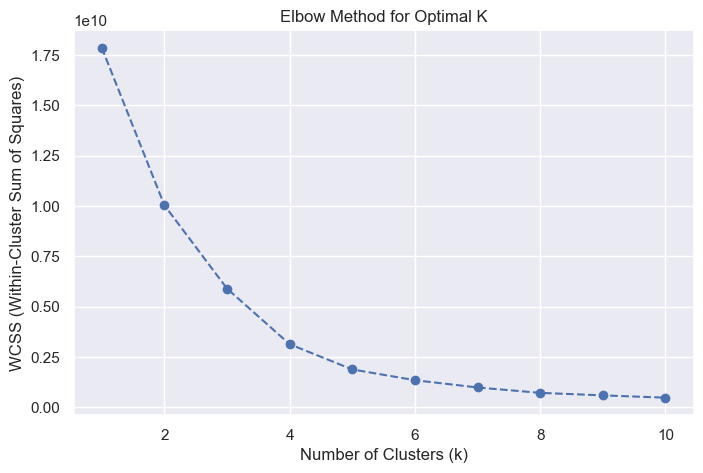

In [140]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [141]:
# Apply K-Means with optimal k (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data["Cluster"] = kmeans.fit_predict(X)

In [143]:
# Step 4: Cluster Profiling
cluster_summary = data.groupby("Cluster").agg(
    Avg_Price=("Product_Price", "mean"),
    Avg_Quantity=("Quantity", "mean"),
    Total_Customers=("Customer_ID", "nunique"),
    Total_Orders=("Order_ID", "count")
).reset_index()

print("Cluster Profile Summary:")
print(cluster_summary)

Cluster Profile Summary:
   Cluster     Avg_Price  Avg_Quantity  Total_Customers  Total_Orders
0        0    221.286221           1.0            27352         71269
1        1   2412.640409           1.0              832          1466
2        2  27761.866667           1.0                6             6
3        3    747.989933           1.0             6580         17817


In [144]:
# Step 5: Business Insights
print("Business Insights:")
for cluster in cluster_summary["Cluster"]:
    avg_price = cluster_summary.loc[cluster_summary["Cluster"] == cluster, "Avg_Price"].values[0]
    avg_quantity = cluster_summary.loc[cluster_summary["Cluster"] == cluster, "Avg_Quantity"].values[0]
    total_orders = cluster_summary.loc[cluster_summary["Cluster"] == cluster, "Total_Orders"].values[0]
    
    print(f"Cluster {cluster}:")
    if avg_price > cluster_summary["Avg_Price"].median():
        print("- High-spending customers: Consider premium offers and personalized promotions.")
    else:
        print("- Price-sensitive customers: Offer discounts and bundled deals.")
    
    if avg_quantity > cluster_summary["Avg_Quantity"].median():
        print("- Bulk buyers: Recommend wholesale pricing and loyalty programs.")
    else:
        print("- Occasional buyers: Engage with email marketing and seasonal promotions.")
    
    print(f"- Total Orders: {total_orders} - Adjust inventory and stock availability accordingly.\n")

Business Insights:
Cluster 0:
- Price-sensitive customers: Offer discounts and bundled deals.
- Occasional buyers: Engage with email marketing and seasonal promotions.
- Total Orders: 71269 - Adjust inventory and stock availability accordingly.

Cluster 1:
- High-spending customers: Consider premium offers and personalized promotions.
- Occasional buyers: Engage with email marketing and seasonal promotions.
- Total Orders: 1466 - Adjust inventory and stock availability accordingly.

Cluster 2:
- High-spending customers: Consider premium offers and personalized promotions.
- Occasional buyers: Engage with email marketing and seasonal promotions.
- Total Orders: 6 - Adjust inventory and stock availability accordingly.

Cluster 3:
- Price-sensitive customers: Offer discounts and bundled deals.
- Occasional buyers: Engage with email marketing and seasonal promotions.
- Total Orders: 17817 - Adjust inventory and stock availability accordingly.



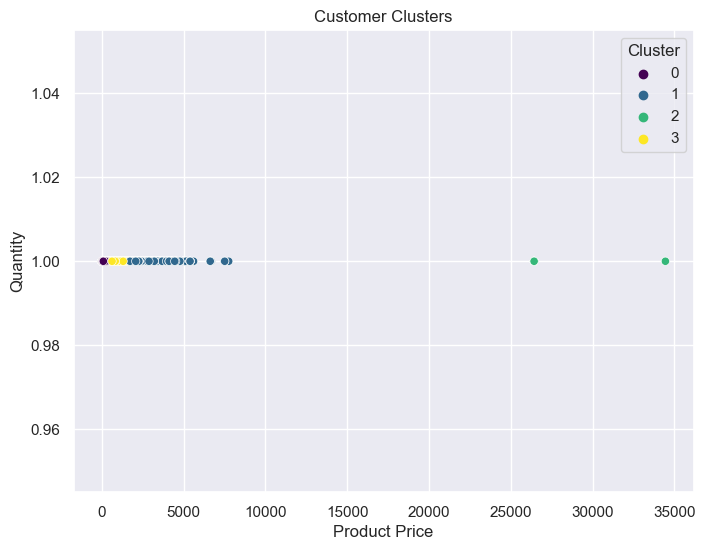

In [145]:
# Step 6: Visualize Clusters
if "Product_Price" in data.columns and "Quantity" in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data["Product_Price"], y=data["Quantity"], hue=data["Cluster"], palette="viridis")
    plt.xlabel("Product Price")
    plt.ylabel("Quantity")
    plt.title("Customer Clusters")
    plt.legend(title="Cluster")
    plt.show()


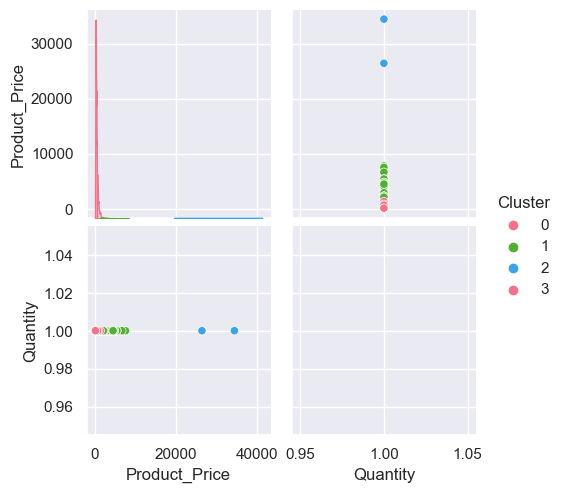

In [147]:
# Step 7: Pair Plot for Deeper Analysis
if "Product_Price" in data.columns and "Quantity" in data.columns:
    sns.pairplot(data, hue="Cluster", vars=["Product_Price", "Quantity"], palette="husl")
    plt.show()

In [149]:
pip install ace_tools

  Obtaining dependency information for ace_tools from https://files.pythonhosted.org/packages/27/c4/402d3ae2ecbfe72fbdcb2769f55580f1c54a3ca110c44e1efc034516a499/ace_tools-0.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.
